# GAN implementation Using pytorch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
file_path = 'SamplingData7.xlsx' 
data = pd.read_excel(file_path)


X = data.values

# Normalize the features to the range [-1, 1]
X_normalized = torch.FloatTensor((X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0)) * 2 - 1)

real_data = X_normalized

# Models
class Generator(nn.Module):
    def __init__(self, latent_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, output_dim),
            nn.Tanh()  
        )

    def forward(self, x):
        return self.model(x)


class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.4),
            nn.Linear(512, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.4),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.4),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)


# Build and initialize the models
latent_dim = 30
generator = Generator(latent_dim, 6)
discriminator = Discriminator(6)

# Loss and optimizers
criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=0.0001)
optimizer_d = optim.Adam(discriminator.parameters(), lr=0.0001)

# Training parameters
batch_size = 128
num_epochs = 5000

# Training the GAN
for epoch in range(num_epochs):
    for i in range(0, real_data.shape[0], batch_size):
        # Train discriminator on real data
        real_labels = torch.FloatTensor(np.random.uniform(0.9, 1.0, (batch_size, 1)))
        real_data_batch = torch.FloatTensor(real_data[i:i+batch_size])
        optimizer_d.zero_grad()
        output_real = discriminator(real_data_batch)
        loss_real = criterion(output_real, real_labels)
        loss_real.backward()

        # Train discriminator on generated data
        fake_labels = torch.FloatTensor(np.random.uniform(0, 0.1, (batch_size, 1)))
        noise = torch.FloatTensor(np.random.normal(0, 1, (batch_size, latent_dim)))
        generated_data = generator(noise)
        output_fake = discriminator(generated_data.detach())
        loss_fake = criterion(output_fake, fake_labels)
        loss_fake.backward()

        optimizer_d.step()

        # Train generator (via the GAN model)
        valid_labels = torch.FloatTensor(np.random.uniform(0.9, 1.0, (batch_size, 1)))
        optimizer_g.zero_grad()
        output_g = discriminator(generated_data)
        loss_g = criterion(output_g, valid_labels)
        loss_g.backward()
        optimizer_g.step()

    # Print progress
    print(f"Epoch {epoch}, D Loss Real: {loss_real.item()}, D Loss Fake: {loss_fake.item()}, G Loss: {loss_g.item()}")

# Generate synthetic data using the trained generator
synthetic_data = generator(torch.FloatTensor(np.random.normal(0, 1, (1000, latent_dim))))

# Plot the results
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for i in range(2):
    for j in range(3):
        axs[i, j].hist(synthetic_data[:, i * 3 + j].detach().numpy(), bins=50, alpha=0.5, label='Synthetic Data')
        axs[i, j].hist(real_data[:, i * 3 + j].numpy(), bins=50, alpha=0.5, label='Real Data')
        axs[i, j].set_title(f'Parameter {i * 3 + j + 1}')

plt.legend()
plt.show()


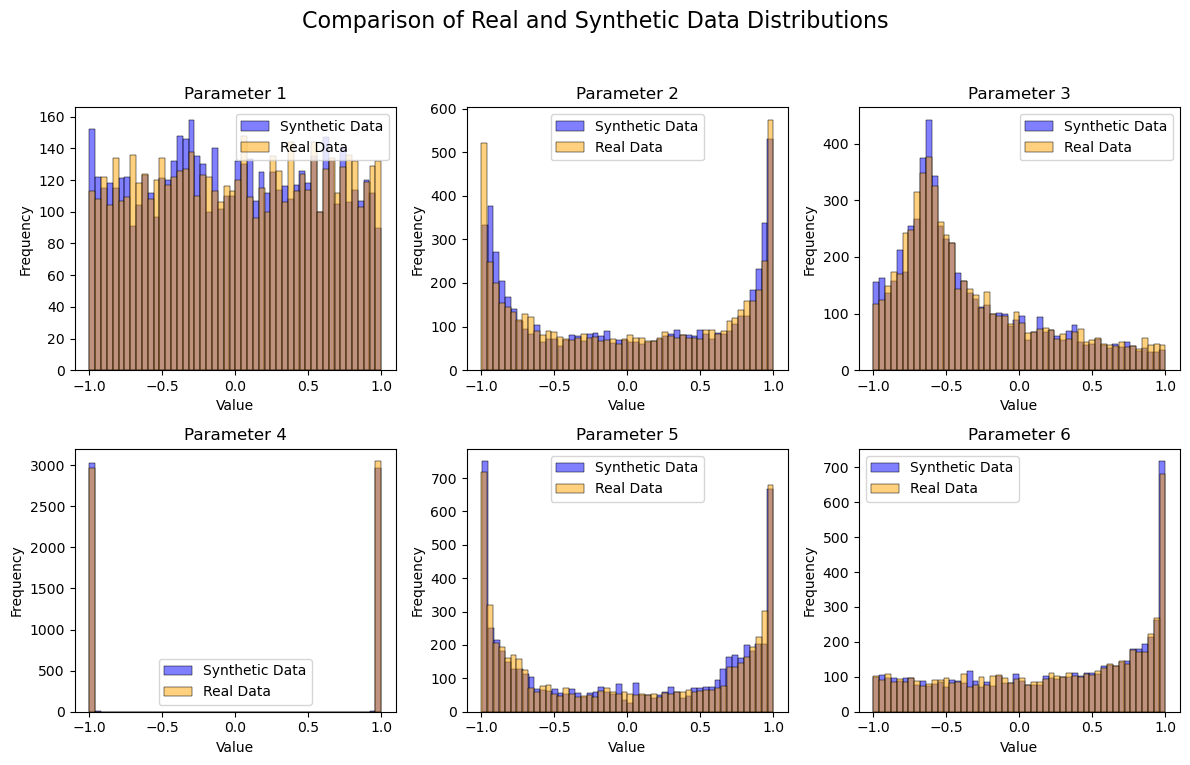

In [18]:
import seaborn as sns

# Generate synthetic data
synthetic_data = generator(torch.FloatTensor(np.random.normal(0, 1, (real_data.shape[0], latent_dim))))

fig, axs = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('Comparison of Real and Synthetic Data Distributions', fontsize=16)

for i in range(2):
    for j in range(3):
        sns.histplot(synthetic_data[:, i * 3 + j].detach().numpy(), bins=50, alpha=0.5, label='Synthetic Data', ax=axs[i, j], color='blue')
        sns.histplot(real_data[:, i * 3 + j].numpy(), bins=50, alpha=0.5, label='Real Data', ax=axs[i, j], color='orange')
        axs[i, j].set_title(f'Parameter {i * 3 + j + 1}', fontsize=12)
        axs[i, j].set_xlabel('Value')
        axs[i, j].set_ylabel('Frequency')
        axs[i, j].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


C:\Users\ns650\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ns650\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ns650\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ns650\anacond

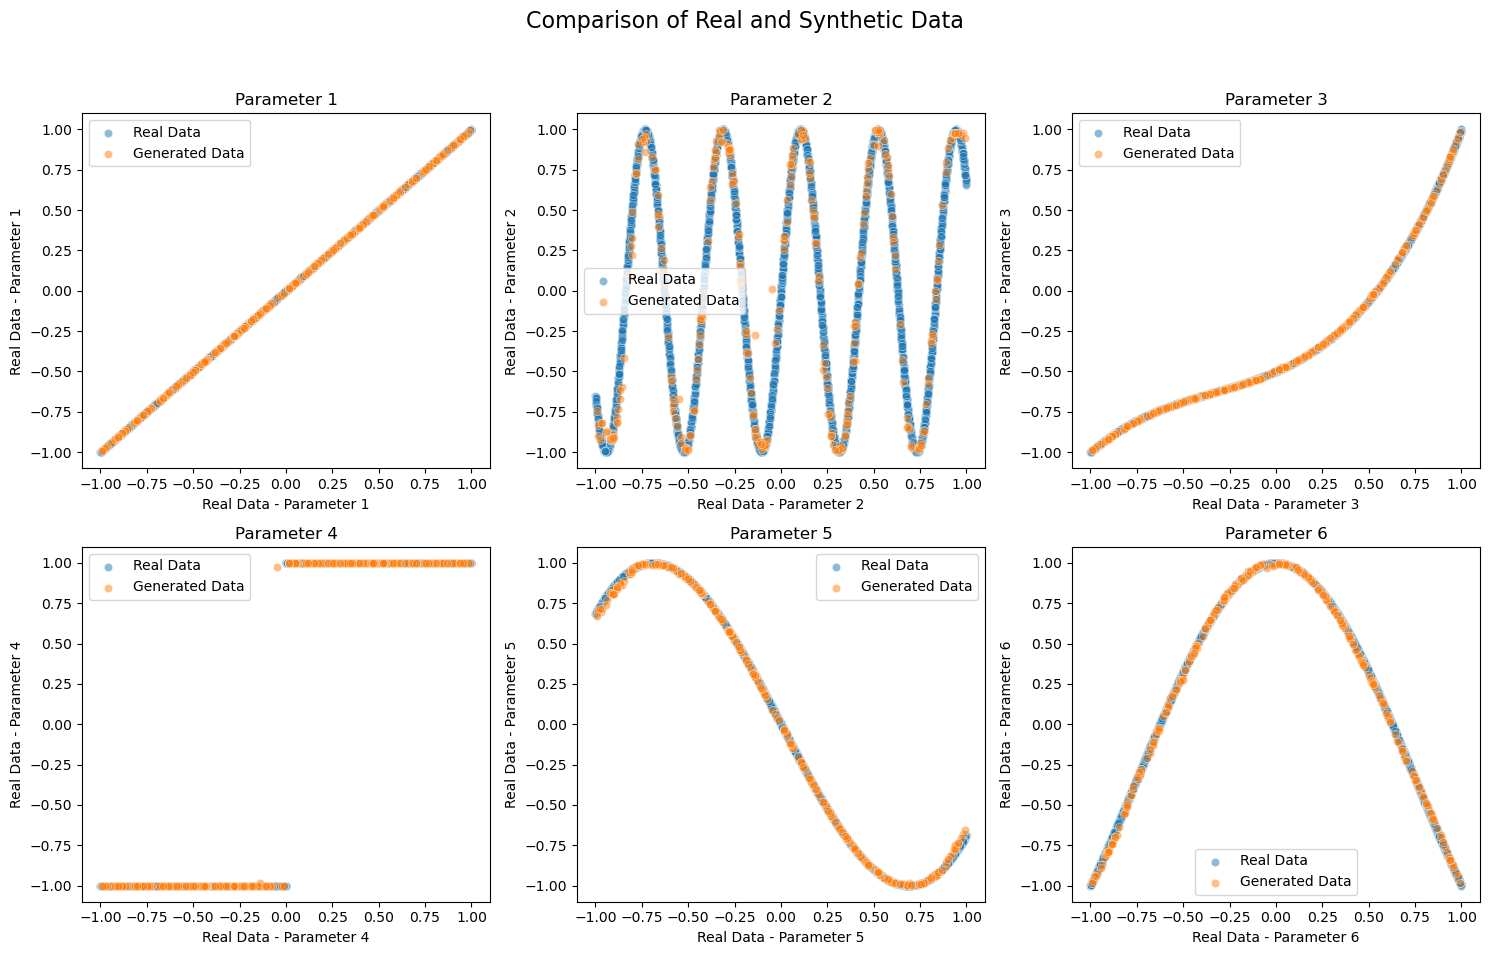

In [19]:
import seaborn as sns


synthetic_data = generator(torch.FloatTensor(np.random.normal(0, 1, (300, latent_dim))))

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Comparison of Real and Synthetic Data', fontsize=16)


param_names = ['Parameter 1', 'Parameter 2', 'Parameter 3', 'Parameter 4', 'Parameter 5', 'Parameter 6']


for i in range(2):
    for j in range(3):
        param_index = i * 3 + j
        sns.scatterplot(real_data[:, 0].numpy(), real_data[:, param_index].numpy(), label='Real Data', alpha=0.5, ax=axs[i, j])
        sns.scatterplot(synthetic_data[:, 0].detach().numpy(), synthetic_data[:, param_index].detach().numpy(), label='Generated Data', alpha=0.5, ax=axs[i, j])
        axs[i, j].set_title(param_names[param_index], fontsize=12)
        axs[i, j].set_xlabel(f'Real Data - {param_names[param_index]}')
        axs[i, j].set_ylabel(f'Real Data - {param_names[param_index]}')
        axs[i, j].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
